<a href="https://colab.research.google.com/github/SANYA-95/summer-of-code-2023/blob/main/US_cars_Price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('USA_cars_datasets-2.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


# Step 1: **Dataset Cleaning** and **Data Visualizatio**n




In [3]:
df = df.drop(['Unnamed: 0','vin','lot'], axis='columns')
df.head(3)

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left


### 1. Let's check if there are any missing values

In [4]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display the missing values information
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})


In [5]:
missing_data

,Missing Values,Missing Percentage
price,0,0.0
brand,0,0.0
model,0,0.0
year,0,0.0
title_status,0,0.0
mileage,0,0.0
color,0,0.0
state,0,0.0
country,0,0.0
condition,0,0.0


**Conclusion:** There are no missing values

### 2. Checking the ***outliers***

**using Zscore for numeric independent variable** i.e year and mileage;  Z-score, also known as a standard score, is a statistical measure that represents the number of standard deviations an individual data point is from the mean of a dataset.

In [6]:
from scipy.stats import zscore

In [7]:
# Compute the Z-scores for each column
z_scores1 = np.abs(zscore(df.year))

threshold = 3

# Identify the outliers
outliers = np.where(z_scores1 > threshold)

# Replace the outliers with appropriate values (e.g., median)
df['year'].iloc[outliers] = df['year'].median()

df['year']

<ipython-input-7-938bdacb9016>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'].iloc[outliers] = df['year'].median()


0       2008
1       2011
2       2018
3       2014
4       2018
        ... 
2494    2019
2495    2018
2496    2018
2497    2018
2498    2018
Name: year, Length: 2499, dtype: int64

In [8]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [9]:
# Compute the Z-scores for each column
z_scores2 = np.abs(zscore(df.mileage))

threshold = 3

# Identify the outliers
outliers1= np.where(z_scores2 > threshold)

# Replace the outliers with appropriate values (e.g., median)
df['mileage'].iloc[outliers1] = df['mileage'].median()

df['mileage']

<ipython-input-9-34caad79ce3a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'].iloc[outliers1] = df['mileage'].median()


0        35365.0
1       190552.0
2        39590.0
3        64146.0
4         6654.0
          ...   
2494     23609.0
2495     34553.0
2496     31594.0
2497     32557.0
2498     31371.0
Name: mileage, Length: 2499, dtype: float64

In [10]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,35365.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


### 3. Finding ***duplicate rows*** if any in the dataset

In [11]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,price,brand,model,year,title_status,mileage,color,state,country,condition


So, we don't have any duplicate rows in the dataset

### 4. Checking ***Outliers*** in non-numeric data

In [12]:
import matplotlib.pyplot as plt

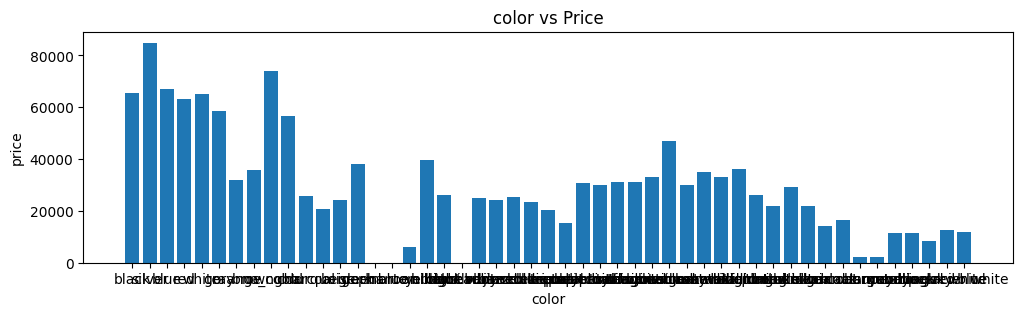

In [13]:
price = df['price']
color = df['color']
plt.figure(figsize=(12, 3))
plt.bar(color,price)
plt.xlabel('color')
plt.ylabel('price')
plt.title('color vs Price')
plt.show()

Taking color into account of independent variable will make the data messy and also except some colors, there is no significant variation between color and price, so drop it.

In [14]:
df=df.drop(['color'], axis='columns')
df.head(3)

,price,brand,model,year,title_status,mileage,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,35365.0,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,georgia,usa,2 days left


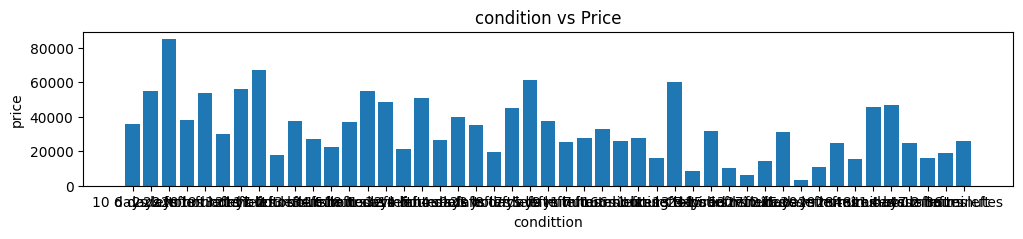

In [15]:
price = df['price']
condition = df['condition']
plt.figure(figsize=(12, 2))
plt.bar(condition,price)
plt.xlabel('condittion')
plt.ylabel('price')
plt.title('condition vs Price')
plt.show()

Taking condition into account of independent variable will make the data messy and also except some condition, there is no significant variation between condition and price, so drop it.

In [16]:
df = df.drop(['condition'], axis='columns')
df.head(3)

,price,brand,model,year,title_status,mileage,state,country
0,6300,toyota,cruiser,2008,clean vehicle,35365.0,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,georgia,usa


Finding outlier in ***brand***

In [17]:
brand_df = df.drop(['model',	'year',	'title_status',	'mileage'	,'state',	'country'],axis='columns')
brand_df.head(3)

,price,brand
0,6300,toyota
1,2899,ford
2,5350,dodge


In [18]:
# Calculate the average of the dependent variable for each unique independent variable
averages = brand_df.groupby('brand')['price'].mean()

# Print the averages alongside the unique independent variable values
for unique_value, average in averages.items():
    print(f"brand: {unique_value}, Average: {average}")

brand: acura, Average: 7266.666666666667
brand: audi, Average: 13981.25
brand: bmw, Average: 26397.058823529413
brand: buick, Average: 19715.76923076923
brand: cadillac, Average: 24941.0
brand: chevrolet, Average: 18669.95286195286
brand: chrysler, Average: 13686.111111111111
brand: dodge, Average: 17781.988425925927
brand: ford, Average: 21666.888259109313
brand: gmc, Average: 10657.380952380952
brand: harley-davidson, Average: 54680.0
brand: heartland, Average: 2966.0
brand: honda, Average: 6127.5
brand: hyundai, Average: 5203.2
brand: infiniti, Average: 13098.333333333334
brand: jaguar, Average: 2800.0
brand: jeep, Average: 10933.833333333334
brand: kia, Average: 11123.846153846154
brand: land, Average: 28900.0
brand: lexus, Average: 33220.0
brand: lincoln, Average: 18150.0
brand: maserati, Average: 30300.0
brand: mazda, Average: 8000.0
brand: mercedes-benz, Average: 28704.0
brand: nissan, Average: 12065.820512820514
brand: peterbilt, Average: 400.0
brand: ram, Average: 11050.0
bran

**** will do this task later (not having enough idea)***

# Step 2: **Implementing various machine learning models**

### First we need to find out among various ML models that which one is most accurate, for this we will be using *train-test-split method*.
1. Linear Regression
2. Polynomial Regression
3. Neural Network
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. Support Vector Regression
8. Bayesian Regression
9. K-Nearest Neighbors
10. XG Boost

In [54]:
raw_data = df.copy()
y = np.array(raw_data['price'])
X_num = np.array(raw_data[['year', 'mileage']])
X_nonnum = np.array(raw_data[['brand', 'model', 'title_status', 'state', 'country']])

print(X_num)
print(X_nonnum)

[[  2008.  35365.]
 [  2011. 190552.]
 [  2018.  39590.]
 ...
 [  2018.  31594.]
 [  2018.  32557.]
 [  2018.  31371.]]
[['toyota' 'cruiser' 'clean vehicle' 'new jersey' ' usa']
 ['ford' 'se' 'clean vehicle' 'tennessee' ' usa']
 ['dodge' 'mpv' 'clean vehicle' 'georgia' ' usa']
 ...
 ['nissan' 'versa' 'clean vehicle' 'florida' ' usa']
 ['nissan' 'versa' 'clean vehicle' 'florida' ' usa']
 ['nissan' 'versa' 'clean vehicle' 'florida' ' usa']]


In [55]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
enc = OneHotEncoder(sparse_output=False)
X_transform = enc.fit_transform(X_nonnum)
print(X_transform)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [63]:
X = np.concatenate((X_transform,X_num),axis=1)
print(X)

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.00800e+03
  3.53650e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.01100e+03
  1.90552e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.01800e+03
  3.95900e+04]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.01800e+03
  3.15940e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.01800e+03
  3.25570e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 2.01800e+03
  3.13710e+04]]


In [65]:
dataset_X=pd.DataFrame(X)
dataset_X

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,35365.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011.0,190552.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,39590.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,64146.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,6654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0,23609.0
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,34553.0
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,31594.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,32557.0


In [69]:
final = pd.concat([dataset_X,raw_data[['price']]], axis='columns')
final

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,35365.0,6300
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011.0,190552.0,2899
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,39590.0,5350
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,64146.0,25000
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,6654.0,27700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019.0,23609.0,7800
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,34553.0,9200
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,31594.0,9200
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,32557.0,9200


1. Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
X=final.drop(['price'],axis='columns')
model1.fit(X,final['price'])

LinearRegression()

In [72]:
model1.score(X,final['price'])

0.7374844698060861

So, the accuracy of this model is 73%